In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [5]:
# Loading the dataset
data = scipy.io.loadmat('extra_32x32.mat')
X = data['X']
y = data['y'].flatten()



In [ ]:
# Fixing labels: Replacing label 10 with 0
y[y == 10] = 0

In [ ]:
# Reshaping  the image data
n_samples = X.shape[-1]
X = X.reshape((32 * 32 * 3, n_samples)).T

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Testing  the model on test data
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Printing and assesing  results
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9080
           1       0.82      0.95      0.88     18293
           2       0.87      0.93      0.89     15066
           3       0.83      0.84      0.84     12125
           4       0.88      0.87      0.87     10123
           5       0.86      0.85      0.86     10770
           6       0.87      0.80      0.83      8196
           7       0.92      0.83      0.88      8763
           8       0.91      0.69      0.78      6939
           9       0.90      0.75      0.82      6872

    accuracy                           0.86    106227
   macro avg       0.87      0.84      0.85    106227
weighted avg       0.86      0.86      0.86    106227



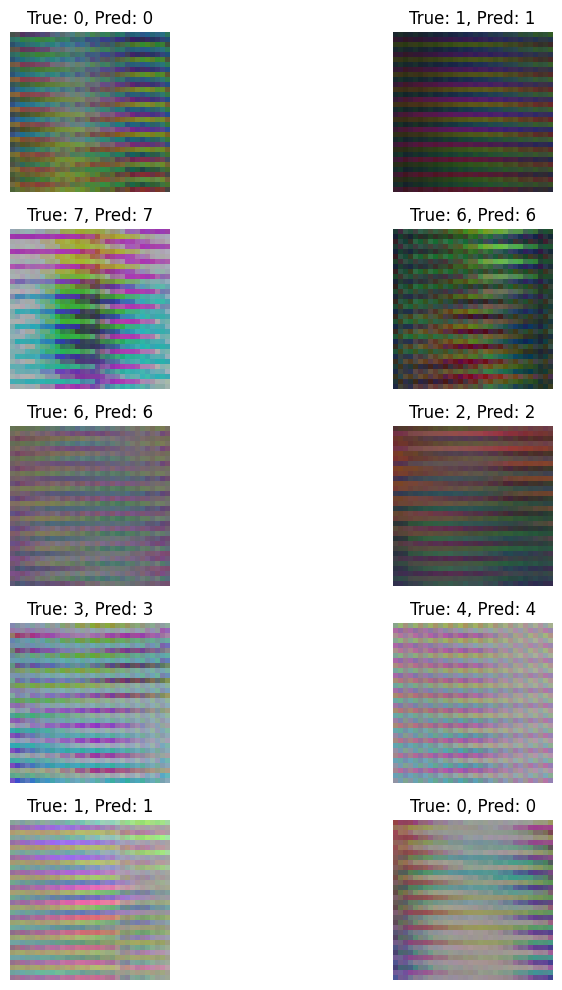

In [ ]:
# Visualize some of the training images with their predicted labels
def visualize_predictions(model, X_data, y_data, num_images=10):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(range(len(X_data)), num_images, replace=False)

    for i, idx in enumerate(indices):
        img = X_data[idx].reshape((32, 32, 3), order='F')  # Reshape and transpose back to original shape
        img = np.transpose(img, (1, 0, 2))  # Correct the image orientation
        label = y_data[idx]
        prediction = model.predict([X_data[idx]])[0]

        plt.subplot(5, 2, i + 1)
        plt.imshow(img)
        plt.title(f'True: {label}, Pred: {prediction}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(rf_model, X_train, y_train)